In [1]:
# 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras

# **1. 이미지 file 가져오기**

In [2]:
# 이미지 처리에 필요한 모듈 준비하기
import os
import glob

In [3]:
path = 'datasets2' # 상위 폴더 경로(datasets)
                   # 상대 경로로 잡아준 경로
                                                              
# 각 잠정에 해당하는 path 잡아주기
path_angry = path+ '\\angry'
path_disgust = path + '\\disgust'
path_fear = path+ '\\fear'
path_happy = path+ '\\happy'
path_neutral = path+ '\\neutral'
path_sad = path+ '\\sad'
path_surprise = path+ '\\surprise'

# 각각의 감정별로 폴더에 접근하여 모든 파일 가져오기 -> 각각의 사진들의 경로들이 저장된다.
angry = glob.glob(path_angry+ '\\*')
disgust = glob.glob(path_disgust+ '\\*')
fear = glob.glob(path_fear+ '\\*')
happy = glob.glob(path_happy+ '\\*')
neutral = glob.glob(path_neutral+ '\\*')
sad = glob.glob(path_sad+ '\\*')
surprise = glob.glob(path_surprise+ '\\*')

print(angry[0])

datasets2\angry\angry_000.jpg


# **2. 이미지 renaming**
* 어지간하면 안하고 버텨볼라 했는데, 다른 거 만들 때 헷갈려서 그냥 바꿀랍니다..ㅎㅅㅎ

In [4]:
# 파일의 이름을 재정의 해주는 함수 정의
def rename(files):
    if 'angry' in files[0]: # 파일 경로에 angry라는 단어가 포함되어 있으면
        for i,f in enumerate(files): # i: 순번, f: 파일
            os.rename(f, os.path.join(path+"\\angry", 'angry_' + '{0:03d}.jpg'.format(i)))
        angry = glob.glob(path+"\\angry" + '\\*')    
        print("angry {}번째 이미지까지 성공".format(i+1))
    
    elif 'disgust' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"\\disgust", 'disgust_' + '{0:03d}.jpg'.format(i)))
        disgust = glob.glob(path+"\\disgust"+'\\*')
        print("disgust {}번째 이미지까지 성공".format(i+1))
    
    elif 'fear' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"\\fear", 'fear_' + '{0:03d}.jpg'.format(i)))
        fear = glob.glob(path+"\\fear"+'\\*')
        print("fear {}번째 이미지까지 성공".format(i+1))
    
    elif 'happy' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"\\happy", 'happy_' + '{0:03d}.jpg'.format(i)))
        happy = glob.glob(path+"\\happy"+'\\*')
        print("happy {}번째 이미지까지 성공".format(i+1))
    
    elif 'neutral' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"\\neutral", 'neutral_' + '{0:03d}.jpg'.format(i)))
        neutral = glob.glob(path+"\\neutral"+'\\*')
        print("neutral {}번째 이미지까지 성공".format(i+1))
    
    elif 'sad' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"\\sad", 'sad_' + '{0:03d}.jpg'.format(i)))
        sad = glob.glob(path+"\\sad"+'\\*')
        print("sad {}번째 이미지까지 성공".format(i+1))
    
    elif 'surprise' in files[0]:
        for i,f in enumerate(files):
            os.rename(f, os.path.join(path+"\\surprise", 'surprise_' + '{0:03d}.jpg'.format(i)))
        surprise = glob.glob(path+"\\surprise"+'\\*')
        print("surprise {}번째 이미지까지 성공".format(i+1))

* 아래의 셀은 초기에(이름 재정의 전) '한번만' 실행해야 함
> 이미 파일 이름이 재정의되어 있으므로 실행시키면 에러나거나 데이터 바뀌니 주의하세요!

In [ ]:
rename(angry)
rename(disgust)
rename(fear)
rename(happy)
rename(neutral)
rename(sad)
rename(surprise)

In [5]:
# 이미지 리스트 정렬
angry = sorted(glob.glob(path+"\\angry" + '\\*'))
disgust = sorted(glob.glob(path+"\\disgust"+'\\*'))
fear = sorted(glob.glob(path+"\\fear"+'\\*'))
happy = sorted(glob.glob(path+"\\happy"+'\\*'))
neutral = sorted(glob.glob(path+"\\neutral"+'\\*'))
sad = sorted(glob.glob(path+"\\sad"+'\\*'))
surprise = sorted(glob.glob(path+"\\surprise"+'\\*'))

In [6]:
# 각 감정에 해당하는 이미지의 개수 확인하기
# 데이터가 편향되지 않도록 그냥 angry 개수 정도로 맞춰서 0번 ~ 2530까지 살림

print('angry 이미지 개수: {}'.format(len(angry)))
print('disgust 이미지 개수: {}'.format(len(disgust)))
print('fear 이미지 개수: {}'.format(len(fear)))
print('happy 이미지 개수: {}'.format(len(happy)))
print('neutral 이미지 개수: {}'.format(len(neutral)))
print('sad 이미지 개수: {}'.format(len(sad)))
print('surprise 이미지 개수: {}'.format(len(surprise)))

angry 이미지 개수: 2531
disgust 이미지 개수: 2531
fear 이미지 개수: 2531
happy 이미지 개수: 2531
neutral 이미지 개수: 2531
sad 이미지 개수: 2531
surprise 이미지 개수: 2531


# **3. 감정 labeling**
- 각각의 감정에 대해 알려줄 수 있는 방법이 요구된다.

In [7]:
feeling_images = [] #감정이 labeling 된 data 전체가 담길 빈 리스트

def put_label(feeling,emotion):
  
  for i in range(len(feeling)):
    filename = str(feeling[i]).split('\\')[-1]
    filename = filename.replace('.jpg','') # filename에서 '.jpg' 날려주기

    feeling_images.append([filename,str(emotion)])  # 매개변수로 넘어오는 감정을 label로 같이 저장

In [8]:
put_label(angry,'angry')
put_label(disgust,'disgust')
put_label(fear,'fear')
put_label(happy,'happy')
put_label(neutral,'neutral')
put_label(sad,'sad')
put_label(surprise,'surprise')

In [9]:
# Dataframe으로 만들기
colnames = ['file_name','emotion']  

feelings_df= pd.DataFrame(feeling_images,columns = colnames)
feelings_df

,file_name,emotion
0,angry_000,angry
1,angry_001,angry
2,angry_002,angry
3,angry_003,angry
4,angry_004,angry
...,...,...
17712,surprise_995,surprise
17713,surprise_996,surprise
17714,surprise_997,surprise
17715,surprise_998,surprise


# **4. 교차 검증**
- 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것
- 대부분의 ML 모델의 성능을 평가할 때는 교차 검증 결과를 기반으로 1차적 평가를 한 후, 최종적으로 테스트 데이터 세트에 적용해 평가를 하는 방식이다.

### **4-1. Stratified K Fold**
- 불균형한(imbalanced) 분포도를 가진 label 데이터 집합을 위한 KFold 방식
- Stratified K Fold는 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 train/test data set를 분배해준다.
- 학습 데이터와 검증 데이터 세트가 가지는 레이블의 분포도가 유사하도록 test data를 추출한다.
> 이렇게 하면 scikitlearn을 이용하여 train_data와 test_data로 나누는 과정은 생략되어도 될 듯함.(여기서 이미 해주고 있으니..?)

In [10]:
# 교차검증을 위한 모듈
from sklearn.model_selection import StratifiedKFold 

In [11]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42) 

feelings_df['fold'] = -1 # 초기값으로 fold에 아무런 영향이 없는 값 설정

for idx, (t,v) in enumerate(skf.split(feelings_df,feelings_df['emotion']),1):  # 1의 의미: fold값을 1번부터 시작하겠다.
    print(t,v,len(v))
    feelings_df.loc[v,'fold'] = idx

[    0     1     3 ... 17714 17715 17716] [    2     5    15 ... 17701 17709 17711] 3544
[    0     1     2 ... 17714 17715 17716] [    4     8    16 ... 17705 17706 17713] 3544
[    0     1     2 ... 17713 17714 17715] [    9    11    12 ... 17703 17704 17716] 3543
[    0     1     2 ... 17714 17715 17716] [    3     6    10 ... 17702 17707 17708] 3543
[    2     3     4 ... 17711 17713 17716] [    0     1     7 ... 17712 17714 17715] 3543


In [12]:
feelings_df

,file_name,emotion,fold
0,angry_000,angry,5
1,angry_001,angry,5
2,angry_002,angry,1
3,angry_003,angry,4
4,angry_004,angry,2
...,...,...,...
17712,surprise_995,surprise,5
17713,surprise_996,surprise,2
17714,surprise_997,surprise,5
17715,surprise_998,surprise,5


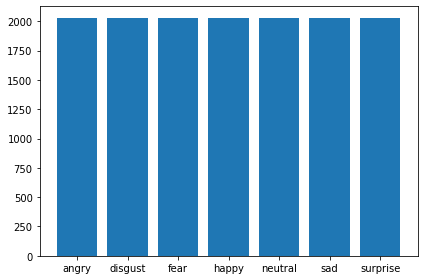

In [13]:
# 시각화를 통해 train dataset과 test dataset이 분배된 양상 파악하기
value_counts = feelings_df[feelings_df['fold'] != 5]['emotion'].value_counts().sort_index()

plt.bar(range(len(value_counts)),value_counts.values,align = "center")
plt.xticks(range(len(value_counts)),value_counts.index.values)

plt.tight_layout()
plt.show()

In [14]:
# 정리된 dataframe을 csv 파일로 내보내기
# 앞에 붙여진 index를 날리고 저장
feelings_df.to_csv('feelings_skfold2.csv',index = False)